<a href="https://colab.research.google.com/github/komh9575/first-repository/blob/main/Day09_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EA%B3%BC%20%EA%B4%80%EB%A0%A8%EB%90%9C%20%EA%B7%B8%20%EB%B0%96%EC%9D%98%20%EB%B0%A9%EB%B2%95%20(PCA%26Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 데이터에서 숨겨진 패턴 찾기: PCA와 클러스터링

지난 시간, 우리는 통계분석의 다양한 방법들을 배웠습니다. 특히, 변수가 많은 고차원 데이터는 해석하기 어렵고, 분석 모델의 성능을 저하시키는 '차원의 저주' 문제가 발생할 수 있다는 점을 확인했습니다. 또한, 정답이 없는 데이터 속에서 숨겨진 구조나 그룹을 찾아내는 비지도 학습의 중요성도 배웠습니다.

오늘은 **주성분 분석(PCA)**을 이용해 복잡한 고객 데이터를 핵심 정보만 남기고 차원을 축소하고, **K-평균(K-Means) 군집분석**을 통해 고객들을 의미 있는 그룹으로 나누는 과정을 직접 코드로 구현합니다. 데이터의 숨겨진 인사이트를 발견하고, 이를 바탕으로 비즈니스 의사결정을 내리는 데이터 분석가의 핵심 역량을 체험하게 될 것입니다.

**🎯 프로젝트 목표:**

1.  **차원 축소의 이해**: '차원의 저주'가 무엇인지 이해하고, **주성분 분석(PCA)**을 통해 고차원 데이터를 시각화 및 분석이 용이한 저차원 데이터로 변환합니다.
2.  **주성분 해석**: PCA로 생성된 새로운 축(주성분)이 원래 데이터의 어떤 특성을 요약하는지 **주성분 부하량(Loadings)**을 통해 해석하는 능력을 기릅니다.
3.  **군집분석 적용**: 정답 없는 데이터에서 자연스러운 그룹을 찾아내는 **K-평균(K-Means) 군집분석**의 원리를 이해하고, 최적의 군집 개수(k)를 찾는 **엘보우 방법(Elbow Method)**을 적용합니다.
4.  **인사이트 도출 및 의사결정**: 차원 축소와 군집분석 결과를 종합하여 각 고객 그룹의 특징(페르소나)을 정의하고, 실제 비즈니스에 적용할 수 있는 마케팅 전략을 제안합니다.


## 🔬 실습 진행 안내

오늘 실습은 다음 순서로 진행됩니다. 각 단계의 목표를 명확히 인지하고 참여해 주세요.

1.  **개인 학습 (Individual Work):**

    - 먼저 **문제 1부터 4까지 모든 문제를 개인적으로** 풀어봅니다. 코드의 빈칸을 채우고, 각 문제의 핵심 개념과 '생각해 볼 문제'에 대한 자신의 답을 정리합니다.
    - 문제들이 서로 연결되어 있으므로(예: 문제 1의 결과는 문제 3에서 사용), 반드시 순서대로 모든 문제를 풀어야 합니다.

2.  **팀별 심화 및 발표 준비 (Team Deep-dive & Preparation):**

    - 각 팀은 **지정된 문제 하나**를 맡아 해당 문제의 '전문가'가 됩니다.
    - 개인적으로 풀었던 내용을 바탕으로, 팀원들과 함께 맡은 문제의 핵심 개념, 소스 코드, 생각해 볼 문제에 대한 답을 더 깊이 있게 토론하고 정리합니다.
    - 각 문제의 마지막에 있는 **'[발표 과제]'** 가이드를 참고하여 발표를 준비합니다.

3.  **팀별 발표 (Team Presentation):**
    - 각 팀은 맡은 문제에 대해 다른 모든 학생들을 가르쳐준다는 생각으로 발표를 진행합니다.
    - 문제의 배경, 핵심 개념, 코드 실행 과정, 결과 해석, 그리고 '생각해 볼 문제'에 대한 팀의 결론을 명확하게 전달해야 합니다.


## 📖 시작하기 전: 핵심 용어 사전

오늘 실습에서 계속 마주칠 핵심 용어들입니다. '이런 게 있구나' 정도로 가볍게 읽고 넘어가세요. 실습을 진행하며 각 용어의 의미가 더 명확해질 것입니다.

- **차원(Dimension):** 데이터가 가진 변수(피처)의 개수. (예: 고객 데이터에 '나이', '소득', '방문 빈도'가 있다면 3차원 데이터)
- **차원의 저주(Curse of Dimensionality):** 차원이 증가할수록 데이터 분석 및 모델링에 필요한 데이터 양이 기하급수적으로 증가하고, 데이터 간의 거리 측정이 어려워지는 현상.
- **주성분 분석(PCA):** 여러 변수 간에 존재하는 상관관계를 이용해, 데이터의 분산(정보)을 가장 잘 설명하는 새로운 축(주성분)들을 찾아 기존 데이터를 요약/축소하는 기법.
- **주성분(Principal Component):** PCA를 통해 생성된 새로운 변수. 첫 번째 주성분(PC1)이 데이터의 분산을 가장 많이 설명하며, 각 주성분은 서로 직교(독립)합니다.
- **기여율(Explained Variance Ratio):** 각 주성분이 전체 데이터 분산의 몇 %를 설명하는지를 나타내는 지표.
- **군집분석(Clustering):** 데이터의 유사성을 기반으로 전체 데이터를 몇 개의 그룹(군집)으로 나누는 비지도 학습 방법.
- **K-평균(K-Means):** 분석가가 지정한 k개의 중심점(centroid)을 기준으로, 각 데이터 포인트를 가장 가까운 중심점에 할당하는 과정을 반복하여 군집을 형성하는 알고리즘.
- **엘보우 방법(Elbow Method):** K-평균 군집분석에서 군집의 개수(k)를 늘려가면서, 각 군집 내 데이터들의 응집도(inertia) 변화를 그래프로 그려 최적의 k를 찾는 방법.


## 사전 준비: 라이브러리 및 데이터 로드

오늘은 데이터 분석을 위한 `pandas`, `numpy`, 시각화를 위한 `matplotlib`, `seaborn`, 그리고 머신러닝을 위한 `scikit-learn` 라이브러리를 사용합니다.


In [3]:
# 필요 라이브러리 설치
# !pip install scikit-learn seaborn

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,429 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [2]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
plt.rc('font', family='NanumGothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 실습용 데이터 생성
np.random.seed(42)
data = pd.DataFrame({
    '연간소득': np.random.normal(5000, 1500, 200).astype(int),
    '소비점수': np.random.randint(1, 101, 200),
    '방문빈도': np.random.randint(1, 101, 200),
    '체류시간': np.random.normal(60, 20, 200).astype(int)
})
print("데이터 생성 완료!")
data.head()

데이터 생성 완료!


,연간소득,소비점수,방문빈도,체류시간
0,5745,2,37,57
1,4792,90,12,84
2,5971,17,55,28
3,7284,33,13,48
4,4648,9,23,60


---

## 🚀 프로젝트 시나리오: "쇼핑몰 고객, 어떻게 그룹화할까?"

우리 팀은 쇼핑몰 고객 데이터를 확보했습니다. 데이터에는 고객의 **'연간소득', '소비점수(1~100점)', '월평균 방문빈도', '평균 체류시간(분)'** 이라는 4가지 변수가 있습니다. 이 4차원 데이터를 이용해 고객들을 비슷한 그룹으로 묶고, 각 그룹의 특성에 맞는 맞춤형 마케팅 전략을 세우고자 합니다.

하지만 4개의 변수를 한 번에 고려하여 고객을 나누는 것은 직관적이지 않고 어렵습니다. 과연 우리는 이 복잡한 데이터를 효과적으로 요약하고, 그 안에 숨겨진 고객 그룹들을 찾아낼 수 있을까요?


## 문제 1 (난이도: 하): 데이터 탐색과 차원 축소의 필요성 이해하기

> **🎯 목표:** 고차원 데이터의 시각적 탐색 한계를 확인하고, PCA를 적용하기 위한 데이터 전처리(스케일링)와 차원 축소를 수행합니다.


### 💡 핵심 개념:

**주성분 분석(PCA)**은 변수의 스케일에 민감합니다. 예를 들어 '연간소득'처럼 값의 범위가 큰 변수가 다른 변수들(예: '소비점수')보다 분석에 더 큰 영향을 미칠 수 있습니다. 이를 방지하기 위해, PCA 적용 전에 각 변수의 평균을 0, 분산을 1로 맞추는 **표준화(Standardization)** 과정을 거치는 것이 일반적입니다. `StandardScaler`가 이 역할을 수행합니다.


### 📌 수행 과제:

1.  `seaborn`의 `pairplot`을 이용해 4개 변수 간의 관계를 시각화하고, 이로부터 고객 그룹을 직관적으로 파악하기 어려운 이유를 생각해봅니다.
2.  `StandardScaler`를 사용하여 데이터를 표준화합니다.
3.  `PCA` 모델을 `n_components=2`로 설정하여 4차원 데이터를 2차원으로 축소합니다.
4.  축소된 2차원 데이터를 산점도(scatter plot)로 시각화하여 데이터가 어떻게 분포하는지 확인합니다.


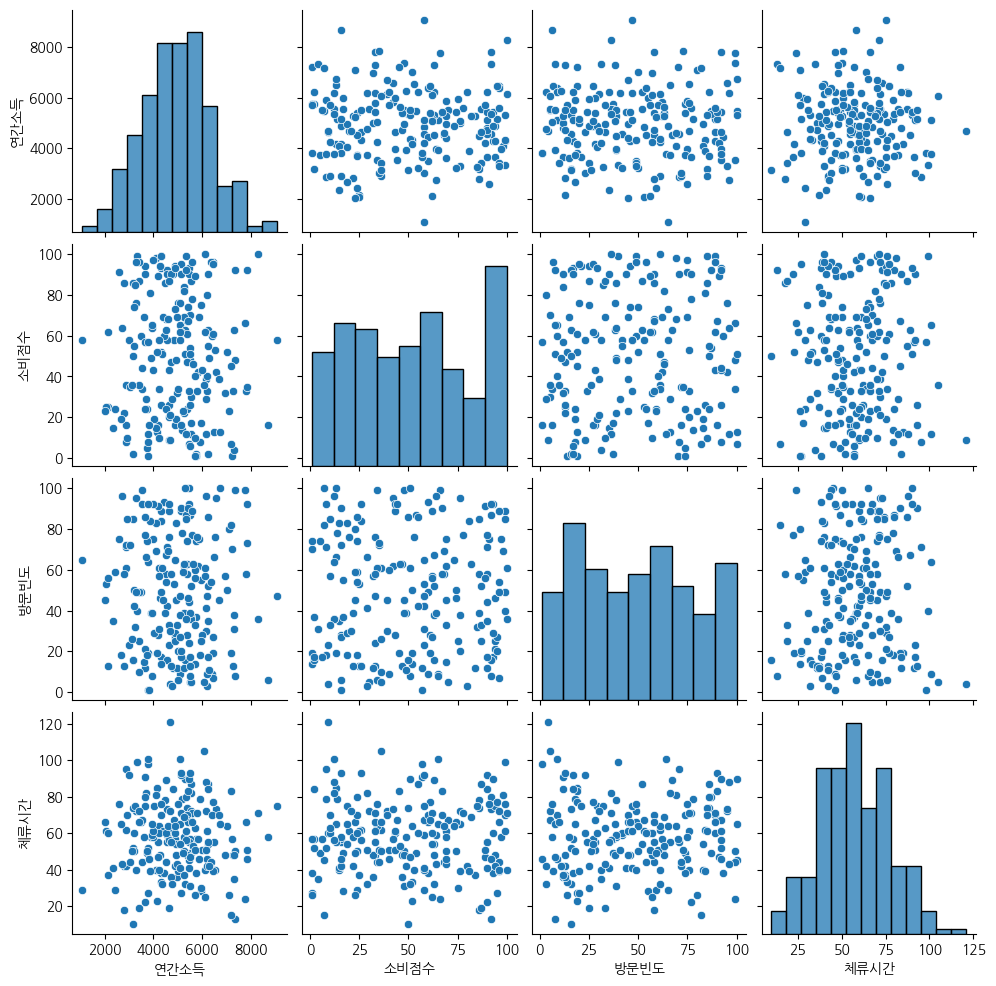

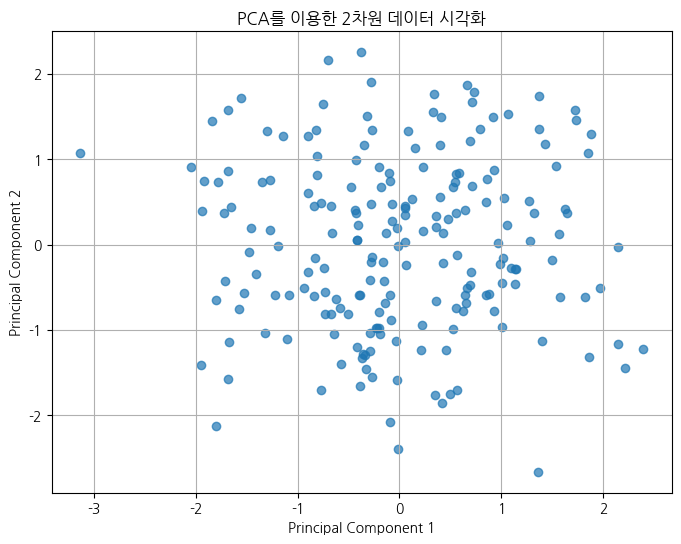

In [3]:
# 1. Pairplot으로 데이터 탐색
sns.pairplot(data)
plt.show()

# 2. 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()
# TODO-1: data를 scaler에 맞추고(fit) 변환(transform)하여 scaled_data에 저장하세요.
scaled_data = scaler.fit_transform(data)
# fit : 데이터의 평균과 분산 계산
# transform : 그 기준으로 데이터 변환

# 3. PCA 수행
# TODO-2: n_components를 2로 설정하여 PCA 모델을 초기화하세요.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
# n_components=2의 의미
# 4차원 데이터를 **2개의 주성분(PC1, PC2)**으로 축소
# 시각화 가능하게 만들기 위함


# 4. PCA 결과 시각화
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA를 이용한 2차원 데이터 시각화')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# --- 해석 ---
# Pairplot과 PCA 산점도를 비교했을 때, 어떤 차이가 있나요? 왜 PCA가 유용한가요? (주석에 직접 작성해보세요)
# Pairplot에서는 각 변수 쌍의 관계를 개별적으로만 확인할 수 있어
# 데이터가 명확한 그룹으로 나뉘는지 한눈에 파악하기 어렵다.
# 특히 점들이 전반적으로 넓게 퍼져 있어 고객 군집 구조를 직관적으로 이해하기 힘들다.
#
# 반면 PCA 산점도에서는 4차원 데이터가 2차원으로 축소되면서
# 데이터 전체의 분포와 중심 구조를 한 번에 확인할 수 있다.
# 완전히 무작위라기보다는 특정 영역을 중심으로 점들이 모여 있는 경향이 보여
# 잠재적인 군집이 존재할 가능성을 시각적으로 탐색할 수 있다.
#
# 따라서 PCA는 고차원 데이터의 구조를 단순화하여
# 시각적 탐색과 이후 군집 분석을 수행하는 데 유용하다.


In [4]:
print(pca.explained_variance_ratio_)


[0.2604065  0.25428317]


In [5]:
print("각 주성분의 설명 분산 비율:", pca.explained_variance_ratio_)
print("PC1 + PC2가 설명하는 전체 분산 비율:", pca.explained_variance_ratio_.sum())

각 주성분의 설명 분산 비율: [0.2604065  0.25428317]
PC1 + PC2가 설명하는 전체 분산 비율: 0.5146896688778171


### 🤔 생각해 볼 문제:

1.  PCA를 통해 4차원 데이터가 2차원으로 축소되었습니다. 이 과정에서 정보의 손실이 발생했을까요? `pca.explained_variance_ratio_` 속성을 출력하고, PC1과 PC2가 전체 데이터 분산의 몇 %를 각각 설명하는지 확인해보세요. 두 주성분을 합치면 총 몇 %의 정보를 보존하고 있나요?
- PC1
→ 전체 데이터 분산의 **약 26.04%**를 설명
- PC2
→ 전체 데이터 분산의 **약 25.43%**를 설명
- 즉, 두 주성분 모두 비슷한 수준으로 데이터를 설명하고 있으며,
특정 하나의 주성분이 압도적으로 지배하지는 않습니다.
- PC1 + PC2 = 약 51.47%
👉 4차원 데이터를 2차원으로 축소하면서 전체 정보의 약 51.5%를 보존하고, 나머지 약 48.5%의 정보는 손실되었습니다.
- PC1과 PC2는 각각 전체 데이터 분산의 약 26%와 25%를 설명하며,
두 주성분을 합치면 전체 분산의 약 51.5%를 설명한다.
이는 2차원으로 차원을 축소하는 과정에서 일부 정보 손실이 발생했지만,
데이터의 절반 이상에 해당하는 핵심 구조는 유지되었음을 의미한다.

2.  만약 데이터 표준화(Scaling) 과정을 생략하고 PCA를 적용한다면 어떤 결과가 나올까요? '연간소득' 변수가 결과에 어떤 영향을 미칠지 예상해보세요.
= 데이터 표준화를 생략하면 값의 범위가 큰 ‘연간소득’ 변수가 PCA 결과에 가장 큰 영향을 미치게 된다. 이로 인해 첫 번째 주성분이 연간소득 중심으로 형성되어, 다른 변수들의 정보가 충분히 반영되지 않는다. 결과적으로 PCA는 여러 변수의 종합적인 특성보다는 소득 기준으로만 데이터를 구분하는 결과를 낳을 수 있다.

3.  2차원으로 축소된 산점도를 보니, 데이터들이 몇 개의 덩어리(군집)로 나뉠 수 있을 것처럼 보이나요? 대략 몇 개의 그룹으로 나눌 수 있을지 예상해보세요.
= PCA로 축소된 2차원 산점도를 보면 데이터들이 완전히 무작위로 분포하기보다는 몇 개의 덩어리 형태로 모여 있는 것을 확인할 수 있다.
이를 통해 데이터가 대략 2~4개의 군집으로 나뉠 가능성이 있다고 예상할 수 있다.

---

### 📢 **[발표 과제]**

문제 1을 맡은 팀은 **데이터 전처리 및 PCA 기본 적용**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '차원의 저주'를 간단한 예시로 설명하고, 왜 PCA와 같은 차원 축소가 필요한지 설명합니다. PCA 전 데이터 스케일링의 중요성을 강조하세요.
= 차원의 저주랑 데이터 차원이 증가할 수록 데이터가 공간에 너무 희석되어 분석, 시각화모델 학습이 어려워지는 현상을 말한다. pca는 데이터 분석을 하나하나 봊디 않고 데이터의 핵심적인 변동 방향만 남겨 차원을 줄이는 방법이다. pca는 분산이 더 큰 변수에 영향을 받는다.
= PCA는 고차원 데이터의 복잡함을 줄이면서도, 데이터의 핵심 구조를 유지해 주는 효과적인 차원 축소 기법이다.

2.  **코드 리뷰:** `StandardScaler`와 `PCA`를 사용하는 과정을 단계별로 설명합니다. Pairplot과 PCA 산점도 결과를 비교하며, PCA가 어떻게 복잡한 데이터를 한눈에 파악하기 쉽게 만드는지 보여줍니다.
= 먼저 pairplot을 사용해 여러 변수 간의 관계를 시각적으로 확인했습니다.
하지만 pairplot은 두 변수씩만 나누어 보여주기 때문에,
여러 변수가 동시에 만들어내는 전체 데이터 구조나 고객 그룹을 한눈에 파악하기에는 한계가 있었습니다.
= PCA는 변수의 스케일에 민감하기 때문에, 분석 전에 StandardScaler를 사용해 데이터를 표준화했습니다.
이 과정에서 각 변수는 평균이 0, 분산이 1이 되도록 변환되어
값의 범위가 큰 변수(예: 연간소득)가 분석 결과를 지배하는 문제를 방지할 수 있습니다.
= 표준화된 데이터에 PCA를 적용하여,
4차원 데이터를 분산을 가장 잘 설명하는 2개의 주성분(PC1, PC2)으로 축소했습니다.
이를 통해 데이터의 핵심적인 변동 구조만 남기고, 시각화가 가능해졌습니다.
= Pairplot에서는 여러 그래프를 각각 비교해야 했던 반면,
PCA 산점도에서는 모든 데이터가 하나의 2차원 공간에 표현되어
데이터의 전체 분포와 구조를 직관적으로 한눈에 확인할 수 있었습니다.
특히 점들이 완전히 무작위로 흩어지기보다는
일정한 영역에 모여 있는 경향을 보여, 잠재적인 군집 구조를 파악할 수 있었습니다.

3.  '생각해 볼 문제' 토의: 위 3가지 질문에 대한 팀의 답변을 공유합니다. 특히 `explained_variance_ratio_`를 해석하는 방법을 통해, PCA가 '정보 손실'과 '데이터 요약' 사이의 트레이드오프 관계에 있음을 설명해 보세요.
- 이번 결과에서 PC1은 전체 데이터 분산의 약 26%, PC2는 약 **25%**를 설명하고 있습니다. 두 주성분을 합치면 약 **51.5%**의 분산을 설명하게 됩니다. 이는 4차원 데이터를 2차원으로 축소하는 과정에서 전체 정보의 절반 정도만 남기고, 나머지 절반에 해당하는 정보는 버렸다는 의미입니다. 즉, 차원 축소를 통해 데이터는 훨씬 간단해졌지만, 그만큼 일부 세부적인 정보는 손실되었습니다.
- 이처럼 PCA는 모든 정보를 그대로 유지하려고 하기보다는, 데이터의 가장 중요한 변동 방향만 선택해 요약합니다. explained_variance_ratio_의 합이 높을수록 정보 손실은 적고 데이터 요약의 품질은 높아지지만, 이를 위해서는 더 많은 주성분을 사용해야 합니다. 반대로 주성분의 수를 줄일수록 데이터는 더 간단해지고 시각화나 해석은 쉬워지지만, 설명되는 분산 비율은 낮아져 정보 손실이 커집니다.

## 문제 2 (난이도: 중): 주성분 의미 해석하기

> **🎯 목표:** PCA로 생성된 주성분(PC1, PC2)이 원래 변수들과 어떤 관계를 갖는지 분석하여, 각 주성분에 의미를 부여합니다.


### 💡 핵심 개념:

**주성분 부하량(Principal Component Loadings)**은 원래 변수와 주성분 간의 상관계수를 나타냅니다. 특정 변수의 부하량 절댓값이 크다면, 그 변수가 해당 주성분을 형성하는 데 중요한 역할을 한다는 의미입니다. `pca.components_` 속성을 통해 이 부하량을 확인할 수 있습니다. 이를 통해 우리는 'PC1은 소득과 관련된 축', 'PC2는 쇼핑 스타일과 관련된 축'과 같이 주성분의 의미를 해석할 수 있습니다.


### 📌 수행 과제:

1.  `pca.components_` 속성을 확인하여 주성분 부하량을 담은 데이터프레임을 생성합니다. (index는 'PC1', 'PC2', columns는 원래 변수명)
2.  `seaborn`의 `heatmap`을 이용해 부하량을 시각화하여 어떤 변수가 각 주성분에 큰 영향을 미치는지 한눈에 파악합니다.
3.  부하량 값을 바탕으로 PC1과 PC2가 각각 어떤 고객 특성을 대표하는지 해석해봅니다.


주성분 부하량:
         연간소득      소비점수      방문빈도      체류시간
PC1 -0.351970 -0.062222  0.629213  0.690172
PC2 -0.248209  0.859043  0.305294 -0.327463


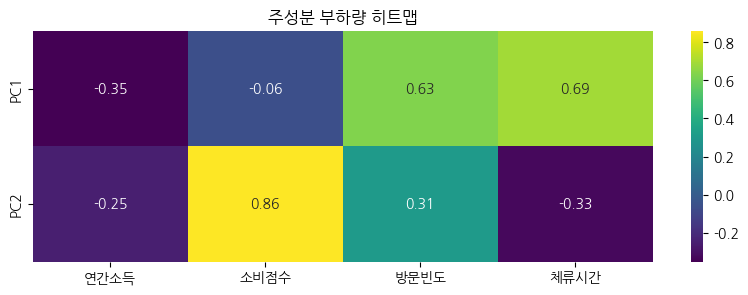

In [6]:
# 1. 주성분 부하량(Loadings) 확인
# pca.components_는 각 주성분이 원래 변수들로 어떻게 구성되어 있는지를 나타내는 값이다.
# 즉, PC1과 PC2가 각각 어떤 변수들의 영향을 얼마나 받는지를 보여준다.
# data.columns를 사용해 열 이름을 원래 변수 이름으로 설정한다.

loadings_df = pd.DataFrame(
    data=pca.components_,     # 주성분별 변수 기여도(부하량)
    columns=data.columns,     # 원래 데이터의 변수 이름
    index=['PC1', 'PC2']      # 첫 번째, 두 번째 주성분
)

# 주성분 부하량 표 출력
print("주성분 부하량:")
print(loadings_df)

# 2. 히트맵으로 부하량 시각화
# 그래프 크기를 설정한다.
plt.figure(figsize=(10, 3))

# 히트맵을 이용해 주성분 부하량을 시각적으로 표현한다.
# annot=True는 각 칸에 숫자 값을 표시하기 위한 옵션이다.
# cmap='viridis'는 값의 크기에 따라 색상을 다르게 표현한다.
# fmt='.2f'는 소수점 둘째 자리까지 표시한다.
sns.heatmap(loadings_df, annot=True, cmap='viridis', fmt='.2f')

# 그래프 제목 설정
plt.title('주성분 부하량 히트맵')

# 히트맵 출력
plt.show()

# 3. 주성분 해석
# PC1의 부하량을 보면 어떤 변수들이 크게 기여하는지 알 수 있다.
# PC1 값이 높다는 것은 해당 변수들의 값이 전반적으로 크다는 것을 의미한다.

# PC2의 부하량을 보면 변수들 간의 차이나 대비가 드러난다.
# PC2 값이 높다는 것은 비슷한 수준의 데이터 중에서도 성향이 다른 특징을 가진다는 의미이다.


### 🤔 생각해 볼 문제:

1.  문제 1에서 그린 PCA 산점도에서 x축(PC1)의 오른쪽으로 갈수록, y축(PC2)의 위쪽으로 갈수록 어떤 특성을 가진 고객들이 위치할 것이라고 예상할 수 있나요? 여러분이 해석한 주성분의 의미와 연결지어 설명해보세요.
= PCA 산점도에서 오른쪽 위에 위치한 고객들은
소득과 소비 수준이 높으면서, 매장을 자주 방문하는 핵심 고객층일 가능성이 높다.

2.  '연간소득'과 '체류시간' 변수는 PC1에 미치는 영향(부하량의 부호)이 서로 비슷했나요, 달랐나요? 이는 두 변수 간에 어떤 관계가 있음을 시사할까요?
= 소득이 높은 고객일수록 체류시간이 짧은 경향이 있을 수 있음을 시사한다.

3.  만약 새로운 주성분 PC3를 추가로 분석한다면, PC3는 PC1이나 PC2가 설명하지 못한 데이터의 어떤 또 다른 특성을 잡아낼 것이라고 기대할 수 있을까요?
= PC3는 전체적인 규모나 빈도보다는 세부적인 행동 특성이나 숨겨진 패턴을 포착할 가능성이 크다
---

### 📢 **[발표 과제]**

문제 2를 맡은 팀은 **주성분 해석**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 주성분 부하량(Loadings)이 무엇인지, 그리고 이 값이 왜 주성분의 '정체'를 파악하는 데 핵심적인지 설명합니다.
= 주성분 부하량(Principal Component Loading)은 주성분 분석(PCA)에서 원래의 변수들이 해당 주성분을 결정하는 데 얼마나 많은 영향을 주었는지를 나타내는 가중치입니다.
- 주요 내용
- 정의: 주성분은 원래 변수들의 선형 결합으로 구성되는데, 이때 각 변수에 곱해지는 계수(가중치)가 바로 부하량입니다.
- 의미: 특정 변수의 부하량이 높다는 것은 해당 변수가 그 주성분을 설명하는 데 중요한 역할을 한다는 것을 의미합니다. 부하량의 절댓값이 클수록 영향력이 크다고 해석합니다.
- PC1은 고객의 소득과 소비 수준을 나타내는 축이며, PC2는 방문 빈도 중심의 행동 특성을 설명한다.
연간소득과 체류시간은 PC1에서 서로 반대 방향으로 작용하여, 두 변수 간의 상반된 관계를 시사한다.
추가적인 주성분인 PC3는 기존 주성분들이 설명하지 못한 세부적인 고객 행동이나 숨겨진 특성을 포착할 것으로 기대된다.

2.  **코드 리뷰 및 결과 해석:** `pca.components_`를 데이터프레임과 히트맵으로 시각화하는 과정을 보여줍니다. 히트맵의 색상과 숫자를 보며 PC1과 PC2가 각각 어떤 원래 변수들과 강하게 연관되어 있는지, 그래서 각 축에 어떤 의미(예: '경제력 축', '쇼핑 열정 축')를 부여할 수 있는지 논리적으로 설명합니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 발표합니다. 특히 PCA 산점도의 각 사분면에 위치할 고객들의 페르소나를 추측해보며, 주성분 해석이 어떻게 데이터에 대한 깊이 있는 이해로 이어지는지 보여주세요.

- 1사분면(PC1이 높고 PC2도 높은 영역)에 위치한 고객들은 소득과 소비 수준이 모두 높고, 매장 방문 빈도 또한 높은 특징을 보입니다. 이들은 자주 방문하면서도 구매력이 높은 고객으로, 충성도가 높은 핵심 VIP 고객층으로 해석할 수 있습니다. 이러한 고객들은 프리미엄 상품이나 멤버십 혜택에 가장 잘 반응할 가능성이 큽니다.

- 다음으로 2사분면(PC1은 낮고 PC2는 높은 영역)에 위치한 고객들은 소득과 소비 수준은 상대적으로 낮지만, 매장을 매우 자주 방문하는 특징을 보입니다. 이들은 큰 금액을 소비하지는 않지만 꾸준히 방문하는 실속형 단골 고객으로 볼 수 있습니다. 따라서 할인 행사나 적립형 이벤트에 민감하게 반응할 가능성이 높은 고객군입니다.

- 3사분면(PC1과 PC2가 모두 낮은 영역)에 위치한 고객들은 소득과 소비 수준이 낮고, 방문 빈도 역시 낮은 경향을 보입니다. 이들은 전반적인 관여도가 낮아 이탈 가능성이 높은 저관여·비활성 고객층으로 해석할 수 있으며, 기본적인 프로모션이나 재방문 유도 전략이 필요한 대상입니다.

- 마지막으로 4사분면(PC1은 높고 PC2는 낮은 영역)에 위치한 고객들은 소득과 소비 수준은 높지만, 매장을 자주 방문하지는 않는 특징을 보입니다. 이들은 필요할 때만 방문하지만 한 번 방문할 경우 소비 금액이 큰 고소득 목적형 고객으로 볼 수 있습니다. 이러한 고객에게는 맞춤형 추천이나 고가 상품 제안이 효과적인 전략이 될 수 있습니다.

## 문제 3 (난이도: 상): K-평균 군집분석으로 고객 그룹 찾기

> **🎯 목표:** K-평균 군집분석을 PCA로 차원 축소된 데이터에 적용하여 고객들을 자동으로 그룹화하고, 엘보우 방법을 이용해 최적의 군집 개수(k)를 결정합니다.


질문. 군집화를 하는 이유는?

정답: 군집화를 하는 이유는 고객 데이터를 의미 있는 그룹으로 나누어, 데이터 속에 숨어 있는 구조와 패턴을 이해하고 이를 실제 의사결정에 활용하기 위해서입니다. 고객 데이터는 대부분 정답 라벨이 없는 비지도 학습 데이터이기 때문에, 사람의 기준으로 일일이 구분하기 어렵습니다. 군집화는 데이터 간의 유사성을 기준으로 고객들을 자동으로 묶어 주어, 서로 비슷한 특성을 가진 고객 그룹을 발견할 수 있게 합니다.

특히 PCA로 차원을 축소한 뒤 군집화를 수행하는 이유는, 원본 고차원 데이터에 포함된 중복 정보와 노이즈를 줄이고 데이터의 핵심적인 구조만 남기기 위함입니다. 이렇게 요약된 데이터에 K-평균 군집분석을 적용하면, 군집 간의 경계가 더 명확해지고 보다 안정적인 결과를 얻을 수 있습니다. 즉, PCA는 데이터를 이해하기 쉽게 정리하는 역할을 하고, K-평균은 그 데이터를 기반으로 고객을 분류하는 역할을 합니다.


### 💡 핵심 개념:

K-평균 알고리즘을 사용하려면 '몇 개의 군집으로 나눌지(k)'를 미리 정해야 합니다. **엘보우 방법(Elbow Method)**은 k를 1부터 점차 늘려가며 각 k에 대한 군집 결과를 평가하는 방법입니다. 평가 지표로는 군집 내 데이터들이 중심에 얼마나 잘 뭉쳐있는지를 나타내는 **이너셔(Inertia)** 값을 사용합니다. k가 증가할수록 이너셔는 계속 감소하는데, 이 감소율이 급격히 완만해지는 지점(그래프 모양이 팔꿈치처럼 꺾이는 부분)을 최적의 k로 선택합니다.


### 📌 수행 과제:

1.  k를 1부터 10까지 변화시키면서 K-평균 군집분석을 반복 수행하고, 각 k에 대한 이너셔(`kmeans.inertia_`) 값을 리스트에 저장합니다.
2.  저장된 이너셔 값을 꺾은선 그래프로 시각화하여 '팔꿈치'에 해당하는 최적의 k를 찾습니다.
3.  찾아낸 최적의 k를 사용하여 K-평균 모델을 다시 학습시키고, 각 데이터 포인트에 대한 군집 레이블을 얻습니다.
4.  PCA 산점도에 군집 레이블에 따라 다른 색상을 적용하여 군집화 결과를 시각화합니다.


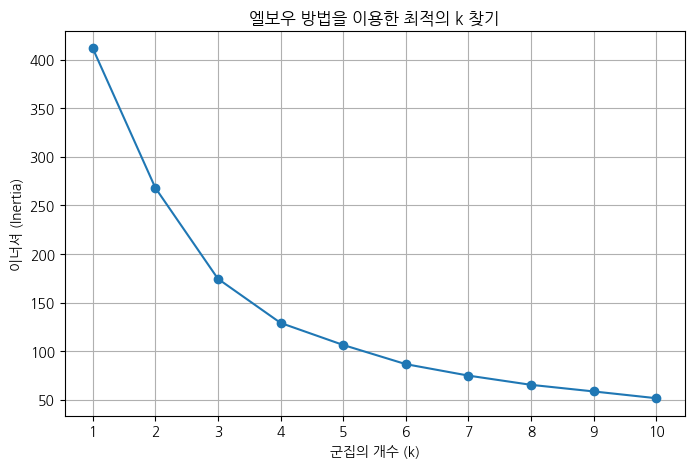

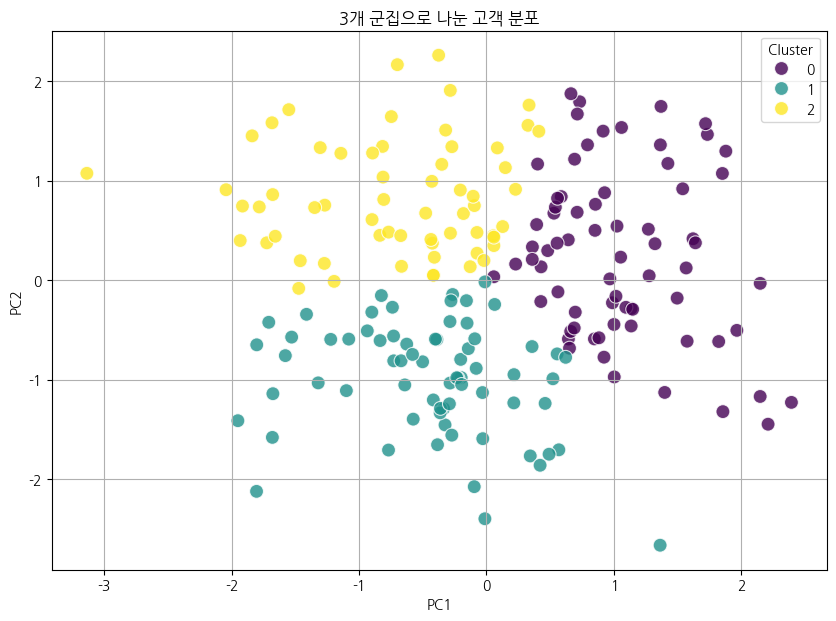

In [8]:
# K-Means 군집화를 위한 라이브러리 불러오기
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# 1. 엘보우 방법을 위한 이너셔(Inertia) 계산
# --------------------------------------------------

# 각 k값에 대한 이너셔 값을 저장할 리스트
inertia_list = []

# 군집 개수를 1부터 10까지 변화시키며 테스트
k_range = range(1, 11)

for k in k_range:
    # KMeans 모델 생성
    # n_clusters=k : 군집 개수를 k로 설정
    # random_state=42 : 실행할 때마다 동일한 결과를 얻기 위해 고정
    # n_init=10 : 초기 중심을 10번 시도하여 가장 좋은 결과 선택
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # PCA로 축소된 2차원 데이터(pca_data)에 K-Means 모델 학습
    kmeans.fit(pca_data)

    # inertia_ : 각 데이터가 속한 군집 중심까지의 거리 제곱합
    # 값이 작을수록 군집이 더 잘 형성되었음을 의미
    inertia_list.append(kmeans.inertia_)

# --------------------------------------------------
# 2. 엘보우 그래프 시각화
# --------------------------------------------------

plt.figure(figsize=(8, 5))

# k값에 따른 이너셔 변화 그래프
plt.plot(k_range, inertia_list, marker='o')

# 그래프 제목
plt.title('엘보우 방법을 이용한 최적의 k 찾기')

# x축: 군집의 개수
plt.xlabel('군집의 개수 (k)')

# y축: 이너셔 값
plt.ylabel('이너셔 (Inertia)')

# x축 눈금을 k값과 동일하게 설정
plt.xticks(k_range)

# 격자 표시로 가독성 향상
plt.grid(True)

# 그래프 출력
plt.show()

# --------------------------------------------------
# 3. 최적의 k로 K-Means 다시 실행
# --------------------------------------------------

# 엘보우 그래프를 보고 꺾이는 지점으로 판단한 최적의 군집 개수
# (예: 보통 3 또는 4에서 엘보우가 나타나는 경우가 많음)
optimal_k = 3

# 최적의 k값으로 KMeans 모델 재생성
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# fit_predict:
# 모델 학습(fit)과 동시에 각 데이터의 군집 라벨을 반환
cluster_labels = kmeans.fit_predict(pca_data)

# --------------------------------------------------
# 4. 군집화 결과 시각화
# --------------------------------------------------

# PCA 결과 데이터프레임에 군집 번호 추가
pca_df['cluster'] = cluster_labels

plt.figure(figsize=(10, 7))

# PC1과 PC2를 기준으로 군집별 색상을 다르게 산점도 시각화
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',      # 군집 번호에 따라 색상 구분
    data=pca_df,
    palette='viridis',
    s=100,              # 점 크기
    alpha=0.8           # 투명도
)

# 그래프 제목에 군집 개수 표시
plt.title(f'{optimal_k}개 군집으로 나눈 고객 분포')

# 격자 표시
plt.grid(True)

# 범례 제목 설정
plt.legend(title='Cluster')

# 그래프 출력
plt.show()


### 🤔 생각해 볼 문제:

1.  엘보우 그래프에서 왜 '팔꿈치' 지점이 최적의 k가 되는 것일까요? k를 그보다 더 크게 설정하면 어떤 장단점이 있을까요?
- 팔꿈치 지점이란, 군집 개수를 늘릴 때 이너셔 감소 효과가 급격히 줄어들기 시작하는 지점으로, 군집 품질 향상과 모델 복잡도 사이의 균형이 가장 잘 맞는 k값이다.
- 그래프를 기준으로 보면, 팔꿈치 지점은 k = 3 또는 k = 4 부근입니다.
- 엘보우 그래프에서 ‘팔꿈치’ 지점이 최적의 k로 선택되는 이유는, 이 지점 이후부터는 군집의 개수를 늘려도 군집 품질이 크게 개선되지 않기 때문입니다.
- K-평균에서 이너셔(Inertia)는 각 데이터가 군집 중심에 얼마나 잘 모여 있는지를 나타내는 지표로, k가 증가할수록 항상 감소합니다. 그러나 어느 시점부터는 k를 늘려도 이너셔 감소 폭이 매우 작아지는데, 이 구간은 군집을 더 세분화하더라도 데이터 구조에 대한 추가적인 설명력이 크지 않음을 의미합니다.
- 따라서 이너셔 감소가 급격히 완만해지는 ‘팔꿈치’ 지점은 군집의 복잡도와 설명력 사이에서 균형이 잡힌 지점으로, 최적의 k로 선택됩니다. 만약 k를 이보다 더 크게 설정하면 군집 내 응집도는 조금 더 좋아질 수 있지만, 군집 수가 지나치게 많아져 해석이 어려워지고 과도한 세분화로 이어질 수 있다는 단점이 있습니다.
- K-평균 군집분석에서 군집의 개수 k는 결과를 결정짓는 매우 중요한 요소입니다. k가 너무 작으면 서로 다른 특성을 가진 데이터들이 하나의 군집으로 묶여 군집의 의미가 모호해지고, 데이터의 구조를 충분히 반영하지 못하게 됩니다. 반대로 k가 너무 크면 군집이 지나치게 세분화되어, 실제로 의미 있는 차이라기보다는 작은 변동이나 노이즈까지 군집으로 나뉘게 됩니다. 이 경우 군집 내 응집도는 높아질 수 있지만, 군집 결과를 해석하거나 활용하기가 어려워집니다.
- 따라서 최적의 k를 찾는 과정은 “군집을 얼마나 세밀하게 나눌 것인가”를 결정하는 문제라고 볼 수 있습니다. 엘보우 방법을 통해 이너셔 감소가 급격히 둔화되는 지점을 찾으면, 군집의 개수를 늘렸을 때 얻는 이득이 크게 줄어드는 시점을 확인할 수 있습니다. 이 지점의 k는 군집 품질 향상과 모델 복잡도 사이에서 가장 효율적인 선택이 되며, 데이터의 핵심 구조를 잘 반영하면서도 결과를 이해하고 활용하기 쉬운 군집 구성을 가능하게 합니다.

2.  군집분석을 원본 데이터(4차원)가 아닌 PCA 데이터(2차원)에 적용했습니다. 이렇게 하는 것의 장점은 무엇일까요? 만약 원본 데이터에 직접 K-평균을 적용했다면 결과가 어떻게 달라졌을지 예상해보세요.
- 이번 분석에서는 군집분석을 원본 데이터(4차원)가 아닌 PCA로 차원 축소된 데이터(2차원)에 적용했습니다. 이렇게 한 가장 큰 장점은 데이터의 핵심 구조만 남기고 노이즈와 중복 정보를 제거할 수 있다는 점입니다.
- PCA를 통해 분산이 큰 방향 위주로 데이터를 요약한 뒤 K-평균을 적용하면, 군집 간의 거리가 더 명확해지고 안정적인 군집 결과를 얻을 수 있습니다. 반대로 원본 데이터에 직접 K-평균을 적용했다면, 변수 간 스케일 차이나 불필요한 정보의 영향으로 인해 거리 계산이 왜곡되고, 군집 경계가 더 불분명해졌을 가능성이 큽니다.
- 즉, PCA는 군집분석을 위한 전처리 단계로서 군집 구조를 더 뚜렷하게 만들어 주는 역할을 합니다.

3.  시각화된 군집 결과를 보면, 군집들이 잘 나뉘었다고 생각하나요? 경계가 모호한 데이터 포인트들은 왜 그렇게 분류되었을지, PCA 산점도와 연관지어 생각해보세요.
- 시각화된 군집 결과를 보면, 전반적으로는 군집들이 비교적 잘 나뉘어 있지만 일부 데이터 포인트는 군집 경계 근처에 위치해 경계가 모호하게 보입니다.
- 이러한 데이터들은 PC1과 PC2 기준으로 어느 한쪽 군집에 명확히 치우치지 않은 특성을 가지고 있기 때문입니다.
- PCA 산점도에서 중심부나 군집 사이 영역에 위치한 점들은 여러 군집과 비슷한 거리를 가지게 되며, K-평균 알고리즘은 이 중 가장 가까운 중심에 해당하는 군집으로 이들을 할당합니다.
- 따라서 경계가 모호한 데이터 포인트들은 데이터의 특성이 명확히 구분되지 않는 경우이며, 이는 PCA 공간에서의 위치와 거리 기반 군집화 방식의 자연스러운 결과라고 해석할 수 있습니다.

---

### 📢 **[발표 과제]**

문제 3을 맡은 팀은 **K-평균 군집분석**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** K-평균 알고리즘의 동작 원리를 간단한 그림이나 비유로 설명합니다. '최적의 k'를 찾는 것이 왜 중요한 문제인지, 그리고 엘보우 방법이 어떻게 그 해답을 주는지 이너셔(Inertia) 개념과 함께 설명하세요.
2.  **코드 리뷰:** 엘보우 그래프를 그리기 위한 for문 코드와, 최적의 k를 결정한 후 군집 결과를 시각화하는 과정을 단계별로 설명합니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 발표합니다. 특히 PCA 데이터에 군집분석을 적용하는 이유(계산 효율성, 노이즈 감소, 시각화 용이성 등)를 명확히 설명하고, 이것이 분석의 질을 어떻게 높이는지 청중을 설득해 보세요.


## 문제 4 (난이도: 중): 고객 세그먼트 분석 및 전략 수립

> **🎯 목표:** 군집분석으로 얻은 그룹별 특성을 원본 데이터와 비교하여 분석하고, 각 그룹에 대한 페르소나를 정의하여 실제 비즈니스에 적용할 마케팅 아이디어를 도출합니다.


### 💡 핵심 개념:

분석의 최종 목표는 '인사이트 발견'과 '액션 제안'입니다. 군집분석으로 얻은 레이블(0, 1, 2...)은 그 자체로는 의미가 없습니다. 이 레이블을 원본 데이터프레임에 다시 붙인 후, 각 그룹이 원본 변수(소득, 소비점수 등)에서 어떤 평균적인 특징을 보이는지 분석해야 비로소 각 그룹의 정체를 파악하고, 'VIP 고객', '잠재 고객', '이탈 위험 고객' 등과 같은 의미 있는 이름을 붙여줄 수 있습니다.


### 📌 수행 과제:

1.  원본 `data` 데이터프레임에 군집 레이블(`cluster_labels`)을 새로운 컬럼으로 추가합니다.
2.  `groupby('cluster')`와 `.mean()`을 사용하여 각 군집별로 4개 원본 변수의 평균값을 계산합니다.
3.  계산된 평균값을 보고 각 군집의 특징을 해석하고, 각 군집에 어울리는 이름(페르소나)을 붙여봅니다. (예: '알뜰 쇼핑족', '쇼핑 중독 VIP' 등)
4.  각 고객 그룹의 특성에 맞는 마케팅 전략을 아이디어 차원에서 제안해봅니다.


In [9]:
# --------------------------------------------------
# 1. 원본 데이터에 군집 레이블 추가
# --------------------------------------------------

# 군집분석 결과로 얻은 cluster_labels를
# 원본 데이터프레임(data)에 'cluster'라는 새로운 컬럼으로 추가한다.
# 이렇게 해야 각 고객이 어떤 군집에 속하는지
# 원본 변수(소득, 소비점수 등)와 함께 분석할 수 있다.
data['cluster'] = cluster_labels


# --------------------------------------------------
# 2. 군집별 특성 분석
# --------------------------------------------------

# 'cluster' 컬럼을 기준으로 데이터를 그룹화(groupby)한 뒤,
# 각 군집별로 모든 수치형 변수의 평균(mean)을 계산한다.
# 이를 통해 각 군집이 원본 데이터에서 어떤 특징을 가지는지 파악할 수 있다.
cluster_summary = data.groupby('cluster').mean()

# 군집별 평균 특성 출력
print("군집별 평균 특성:")
print(cluster_summary)


# --------------------------------------------------
# 3. 군집별 페르소나 정의 및 마케팅 전략 수립
# --------------------------------------------------

# 아래에서는 위에서 계산한 cluster_summary를 참고하여
# 각 군집의 특성을 해석하고 의미 있는 이름(페르소나)을 붙인다.
# 마지막으로 각 군집에 적합한 마케팅 전략을 아이디어 차원에서 제안한다.

# Cluster 0: 어떤 특성을 가졌나요?
# 예: 소득과 소비 수준이 모두 높고 방문 빈도도 높은 경우
#   - 페르소나: 핵심 VIP 고객
#   - 마케팅 전략: 프리미엄 상품 추천, 멤버십 혜택 강화, 개인화 서비스 제공

# Cluster 1: 어떤 특성을 가졌나요?
# 예: 소득과 소비는 낮지만 방문 빈도가 높은 경우
#   - 페르소나: 알뜰 쇼핑족 / 단골 고객
#   - 마케팅 전략: 할인 쿠폰 제공, 적립 포인트 강화, 재방문 이벤트

# Cluster 2: 어떤 특성을 가졌나요?
# 예: 소득과 소비, 방문 빈도가 모두 낮은 경우
#   - 페르소나: 이탈 위험 고객
#   - 마케팅 전략: 재방문 유도 프로모션, 관심 상품 추천, 체험 이벤트 제공

# (군집 개수가 더 많다면 동일한 방식으로 Cluster 3, Cluster 4 등을 추가)


군집별 평균 특성:
                연간소득       소비점수       방문빈도       체류시간
cluster                                              
0        4357.914286  52.785714  73.000000  68.814286
1        5478.362319  27.000000  30.536232  59.101449
2        4993.491803  74.688525  40.475410  43.967213


### 🤔 생각해 볼 문제:

1.  이번 분석(PCA + K-Means)을 통해 얻은 가장 중요한 비즈니스 인사이트는 무엇이라고 생각하나요? 만약 이 분석을 하지 않았다면 어떤 점을 놓쳤을까요?
- 이번 분석(PCA + K-Means)을 통해 얻은 가장 중요한 비즈니스 인사이트는, 고객들이 하나의 동질적인 집단이 아니라 소득·소비 수준과 행동 패턴에 따라 명확히 구분되는 여러 유형의 그룹으로 구성되어 있다는 점입니다. PCA를 통해 복잡한 고차원 데이터를 요약한 뒤 군집분석을 적용함으로써, 고소득·고소비 고객, 자주 방문하는 실속형 고객, 관여도가 낮은 이탈 위험 고객 등 서로 다른 특성을 가진 고객 세그먼트를 데이터 기반으로 도출할 수 있었습니다. 만약 이러한 분석을 수행하지 않았다면, 모든 고객을 평균적인 하나의 집단으로만 바라보게 되어 고객 간의 중요한 차이를 놓쳤을 가능성이 큽니다. 그 결과, 모든 고객에게 동일한 마케팅 전략을 적용하게 되어 자원의 비효율적 사용이나 핵심 고객에 대한 기회 손실이 발생했을 수 있습니다.

2.  K-평균 군집분석은 항상 원형의 군집을 잘 찾아내는 경향이 있습니다. 만약 데이터가 길쭉하거나 특이한 모양으로 분포해 있다면 K-평균이 적합하지 않을 수 있습니다. 이런 경우 어떤 다른 군집분석 방법을 고려해볼 수 있을까요? (힌트: `DBSCAN`, `Hierarchical Clustering`)
- 한편, K-평균 군집분석은 각 군집이 원형에 가깝고 크기가 비슷하다는 가정을 전제로 합니다. 따라서 데이터가 길쭉한 형태이거나 밀도가 서로 다른 복잡한 구조를 가진 경우에는 적합하지 않을 수 있습니다. 이러한 상황에서는 DBSCAN과 같은 밀도 기반 군집분석을 고려해볼 수 있습니다. DBSCAN은 군집의 개수를 미리 정하지 않아도 되며, 밀도가 높은 영역을 중심으로 군집을 형성하고 노이즈 데이터까지 식별할 수 있다는 장점이 있습니다. 또한 **Hierarchical Clustering(계층적 군집분석)**은 데이터 간의 거리 관계를 바탕으로 단계적으로 군집을 형성하기 때문에, 군집 구조를 트리 형태로 시각화하며 다양한 군집 개수를 유연하게 탐색할 수 있습니다. 데이터의 분포 형태에 따라 이러한 대안적 방법들이 K-평균보다 더 적합한 결과를 제공할 수 있습니다.

3.  이번 분석은 고객을 몇 개의 뚜렷한 그룹으로 나누었습니다. 하지만 실제 고객의 특성은 이렇게 칼로 자르듯 나뉘지 않을 수 있습니다. 이러한 '그룹화' 모델링의 장점과 현실 세계에 적용할 때의 잠재적 한계는 무엇일까요?
- 마지막으로, 이번 분석처럼 고객을 몇 개의 그룹으로 나누는 ‘그룹화’ 모델링은 복잡한 현실을 단순화하여 이해하고 의사결정에 활용할 수 있다는 큰 장점이 있습니다. 고객을 대표적인 몇 가지 유형으로 정리함으로써 전략 수립과 커뮤니케이션이 훨씬 쉬워집니다. 그러나 실제 고객의 특성은 연속적인 스펙트럼에 가깝기 때문에, 특정 고객이 하나의 군집에 완전히 속한다고 단정하는 데에는 한계가 있습니다. 군집 경계에 위치한 고객은 상황이나 행동 변화에 따라 다른 군집으로 이동할 가능성도 큽니다. 따라서 군집분석 결과는 절대적인 진실이라기보다는, 의사결정을 돕는 참고 기준으로 활용하고, 정성적 판단이나 추가 분석과 함께 사용하는 것이 바람직합니다.

---

### 📢 **[발표 과제]**

문제 4를 맡은 팀은 **인사이트 도출 및 비즈니스 적용**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 데이터 분석의 최종 목표가 '보고서 작성'이 아닌 '실질적 가치 창출'에 있음을 강조합니다. 군집 레이블을 다시 원본 데이터와 결합하여 해석하는 과정의 중요성을 설명하세요.
- 군집분석을 통해 얻은 레이블(0, 1, 2 등)은 그 자체로는 아무런 의미가 없습니다.
이 숫자에 의미를 부여하기 위해 반드시 필요한 과정을 거쳐야 한다. 그것이 군집 레이블을 다시 원본 데이터와 결합해 해석하는 단계라 할 수 있다.

2.  **코드 리뷰 및 결과 해석:** `groupby().mean()` 코드의 의미를 설명하고, 출력된 요약 통계표를 어떻게 해석하여 각 군집의 특징을 잡아냈는지 상세히 보여줍니다. 각 군집에 붙인 창의적인 페르소나와 그 근거를 발표하세요.
- groupby().mean()
- 위의 코드는 'cluster' 컬럼을 기준으로 데이터를 그룹화(groupby)한 뒤, 각 군집별로 모든 수치형 변수의 평균(mean)을 계산하는 과정이었다. 이를 통해 각 군집이 원본 데이터에서 어떤 특징을 가지는지 파악할 수 있다.

3.  **종합 결론 및 토의:** 각 페르소나에 맞춰 제안한 마케팅 전략을 발표하며, 어떻게 데이터 분석 결과가 구체적인 비즈니스 액션으로 이어질 수 있는지 보여줍니다. '생각해 볼 문제' 토의를 통해, 이번 프로젝트 전체를 되돌아보고 데이터 기반 의사결정의 가치와 잠재적 한계에 대해 논의하며 전체 실습을 마무리하세요.

- Cluster 0: 어떤 특성을 가졌나요?
0 예: 소득과 소비 수준이 모두 높고 방문 빈도도 높은 경우
- 페르소나: 핵심 VIP 고객
- 마케팅 전략: 프리미엄 상품 추천, 멤버십 혜택 강화, 개인화 서비스 제공

Cluster 1: 어떤 특성을 가졌나요?
예: 소득과 소비는 낮지만 방문 빈도가 높은 경우
- 페르소나: 알뜰 쇼핑족 / 단골 고객
- 마케팅 전략: 할인 쿠폰 제공, 적립 포인트 강화, 재방문 이벤트

Cluster 2: 어떤 특성을 가졌나요?
예: 소득과 소비, 방문 빈도가 모두 낮은 경우
- 페르소나: 이탈 위험 고객
- 마케팅 전략: 재방문 유도 프로모션, 관심 상품 추천, 체험 이벤트 제공
